In [2]:
# %matplotlib inline
%time from hikyuu.interactive import *

2025-11-04 21:46:43,531 [INFO] runing in interactive session [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:131) [hikyuu::hku_info]
2025-11-04 21:46:43,531 [INFO] running in jupyter [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:138) [hikyuu::hku_info]


2025-11-04 21:46:43.544 [HKU-I] - Plugin path: F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\plugin (StockManager.cpp:113)
2025-11-04 21:46:43.717 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-11-04 21:46:43.720 [HKU-I] - 加载市场信息…… (StockManager.cpp:704)
2025-11-04 21:46:43.721 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:722)
2025-11-04 21:46:43.722 [HKU-I] - 加载证券信息…… (StockManager.cpp:602)
2025-11-04 21:46:43.849 [HKU-I] - 加载权息数据…… (StockManager.cpp:740)
2025-11-04 21:46:44.058 [HKU-I] - 加载板块信息…… (StockManager.cpp:182)
2025-11-04 21:46:44.354 [HKU-I] - 加载K线数据…… (StockManager.cpp:186)
2025-11-04 21:46:44.355 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:231)
2025-11-04 21:46:44.355 [HKU-I] - 0.64 秒数据加载完毕. (StockManager.cpp:193)
CPU times: total: 3.7 s
Wall time: 3.51 s


KData{
  size : 100
  stock: Stock(SH, 880003, 通达信平均股价, 指数, 1, 2011-10-19 00:00:00, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
  first: KRecord(Datetime(20250609000000), 21.5000, 21.7300, 21.4900, 21.7300, 131265540.9000, 10544490.0000)
  last: KRecord(Datetime(20251103000000), 26.5100, 26.5900, 26.2100, 26.5900, 213290726.2000, 13682309.0000)
}


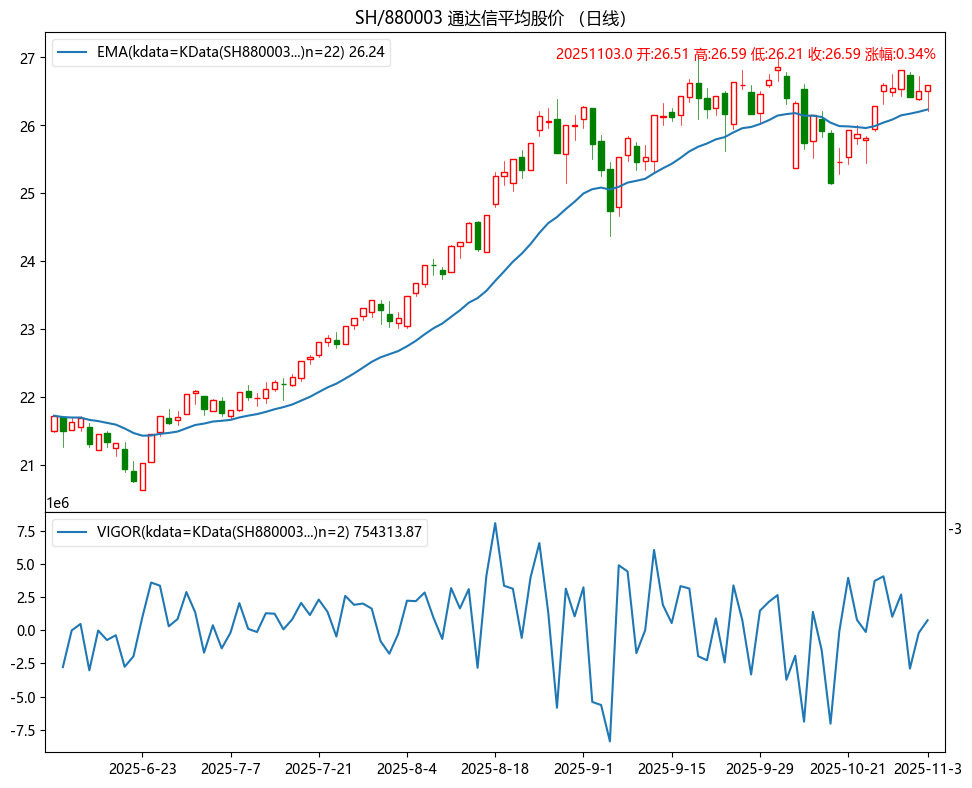

In [11]:
# s = sm['sz000001']
# s = sm['sh688004']
# s = sm['sh688981']
# s = sm['sz001285']
s = sm['sh880003']
# s = sm['sz399006']
# s = sm['sh000688']
# s = sm['sz300502']
k = s.get_kdata(Query(-100))
print(k)

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

5265
Indicator{
  name: INSUM
  size: 200
  discard: 0
  result sets: 1
  params: params[block(Block): Block(, ), fill_null(bool): 1, ignore_context(bool): 0, kdata(KData): Null, market(string): SH, mode(int): 0, query(Query): KQuery(-200, 9223372036854775807, INDEX, DAY, FORWARD), ]
  support indicator param: False
  formula: INSUM(CLOSE > MA(CLOSE))
  values0: [35, 4088, 3057, ..., 2437, 2686, 2500]
}
Indicator{
  name: DIV
  size: 200
  discard: 0
  result sets: 1
  params: params[kdata(KData): Null, ]
  support indicator param: False
  formula: INSUM(CLOSE > MA(CLOSE)) / INSUM(OPEN > CVAL)
  values0: [0.00677245, 0.791328, 0.59141, ..., 0.46322, 0.510161, 0.475828]
}


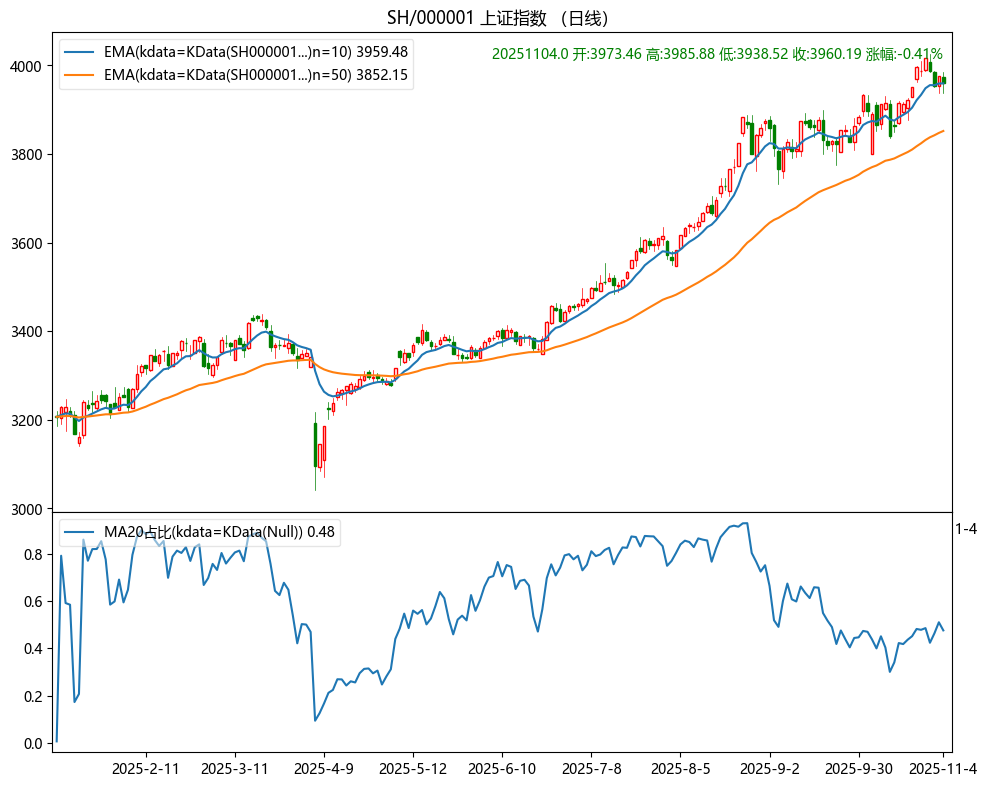

In [3]:
# 计算全A
UP_MA50 = CLOSE() > MA(CLOSE(), 50)

def stock_filter(stk: Stock):

    # 上市一年以上
    # ipc_1year = (stk.start_datetime + Days(365) < Datetime.today())
    # start_0 = stk.code.startswith('000')
    not_st = 'ST' not in stk.name
    # 所属市场如下
    return (
        # ipc_1year and 
            # start_0 and
            not_st and
            (stk.type == constant.STOCKTYPE_A or
            stk.type == constant.STOCKTYPE_GEM or
            stk.type == constant.STOCKTYPE_START or
            stk.type == constant.STOCKTYPE_A_BJ))

stk_list = sm.get_stock_list(stock_filter)
# stk_list.sort(key=lambda x: x.start_datetime)

# stk_list.sort(key=lambda x: x.market)
print(len(stk_list))

# 统计这批票里面上MA50的数量
q = Query(-200, recover_type=Query.FORWARD)
up_ma50_ind = INSUM(stk_list,  q, ind=UP_MA50, mode=0)
print(up_ma50_ind)

ALL_NUM = OPEN()>0
# 统计这批票里面单价不为空
all_num_ind = INSUM(stk_list, Query(-200), ind=ALL_NUM, mode=0)
# print(all_num_ind)

up_ma50_percent = up_ma50_ind / all_num_ind

print(up_ma50_percent)

s = sm['sh000001']
k = s.get_kdata(Query(-200))
#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma10 = EMA(CLOSE(k), 10)
ma50 = EMA(CLOSE(k), 50)
ma10.plot(axes=ax1, legend_on=True)
ma50.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
# v = VIGOR(k)
# v.plot(axes=ax2, legend_on=True)
up_ma50_percent.name = 'MA20占比'
up_ma50_percent.plot(axes=ax2, legend_on=True)


In [13]:
# ind = INSUM(blockstart, Query(-100), OPEN() > 0, mode=0)
# print(ind)
help(RANK)
help(INSUM)

Help on built-in function RANK in module hikyuu.cpp.core312:

RANK(...) method of pybind11_builtins.pybind11_detail_function_record_v1_msvc_md_mscver19 instance
    RANK(*args, **kwargs)
    Overloaded function.

    1. RANK(stks: collections.abc.Sequence, mode: typing.SupportsInt = 0, fill_null: bool = True, market: str = 'SH') -> hikyuu.cpp.core312.Indicator

    2. RANK(stks: collections.abc.Sequence, ref_ind: hikyuu.cpp.core312.Indicator, mode: typing.SupportsInt = 0, fill_null: bool = True, market: str = 'SH') -> hikyuu.cpp.core312.Indicator

    RANK(stks, ref_ind, mode = 0, fill_null = true, market = 'SH')

        计算指标值在指定板块中的排名

        :param stks: 指定证券列表 或 Block
        :param ref_ind: 参考指标
        :param mode: 排序方式: 0-降序排名(指标值最高值排名为1), 1-升序排名(指标值越大排名值越大), 2-降序排名百分比, 3-升序排名百分比
        :param fill_null: 是否填充缺失值
        :param market: 板块所属市场
        :return: 指标值在指定板块中的排名
        :rtype: Indicator

Help on built-in function INSUM in module hikyuu.cpp.core312:

INSUM(...) method

In [21]:
from IPython.display import *

# 开始试验，统计全A数量
ALL_NUM = ISNA(OPEN())
print(ALL_NUM)
ind = INSUM(blocksz, Query(-100), ind=ALL_NUM, mode=0)
print(ind)

Indicator{
  name: ISNA
  size: 0
  discard: 0
  result sets: 1
  params: params[ignore_discard(bool): 0, kdata(KData): Null, ]
  support indicator param: False
  formula: ISNA(OPEN)
  values0: []
}
Indicator{
  name: INSUM
  size: 100
  discard: 0
  result sets: 1
  params: params[block(Block): Block(A, SZ), fill_null(bool): 1, ignore_context(bool): 0, kdata(KData): Null, market(string): SH, mode(int): 0, query(Query): KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER), ]
  support indicator param: False
  formula: INSUM(ISNA(OPEN))
  values0: [0, 0, 0, ..., 0, 0, 0]
}


Indicator{
  name: MUL
  size: 100
  discard: 10
  result sets: 1
  params: params[kdata(KData): SH600759, ]
  support indicator param: False
  formula: CLOSE / REF(CLOSE) - CVAL * CVAL
  first: 2025-06-09 00:00:00
  last: 2025-11-03 00:00:00
  values0: [nan, nan, nan, ..., 0.858369, 1.28205, 8.29876]
}


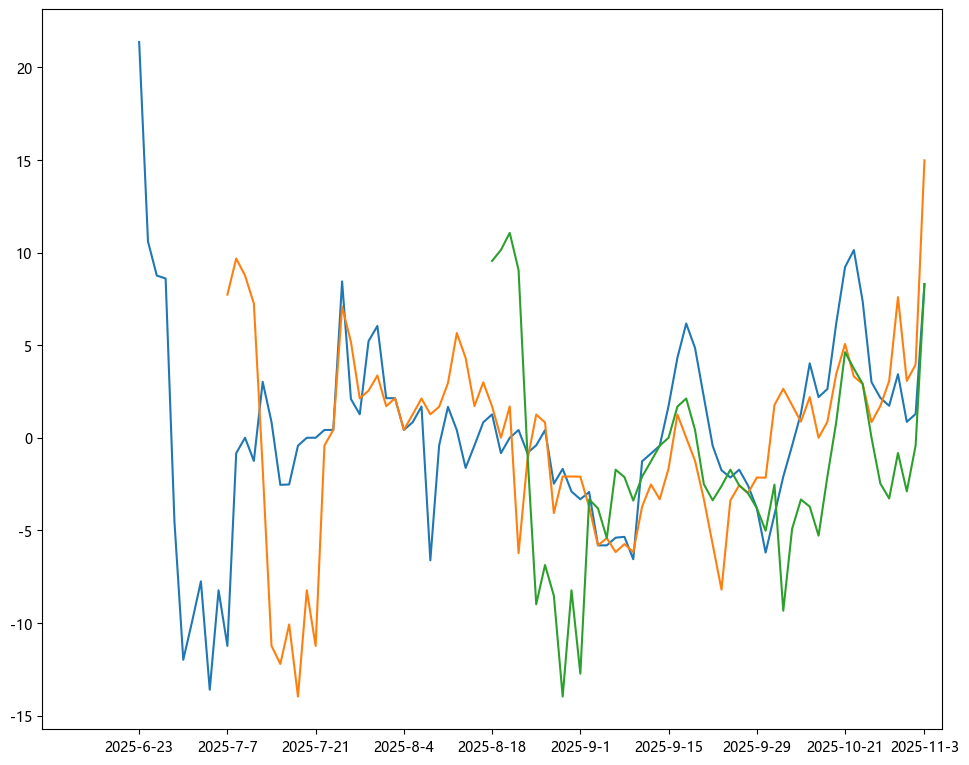

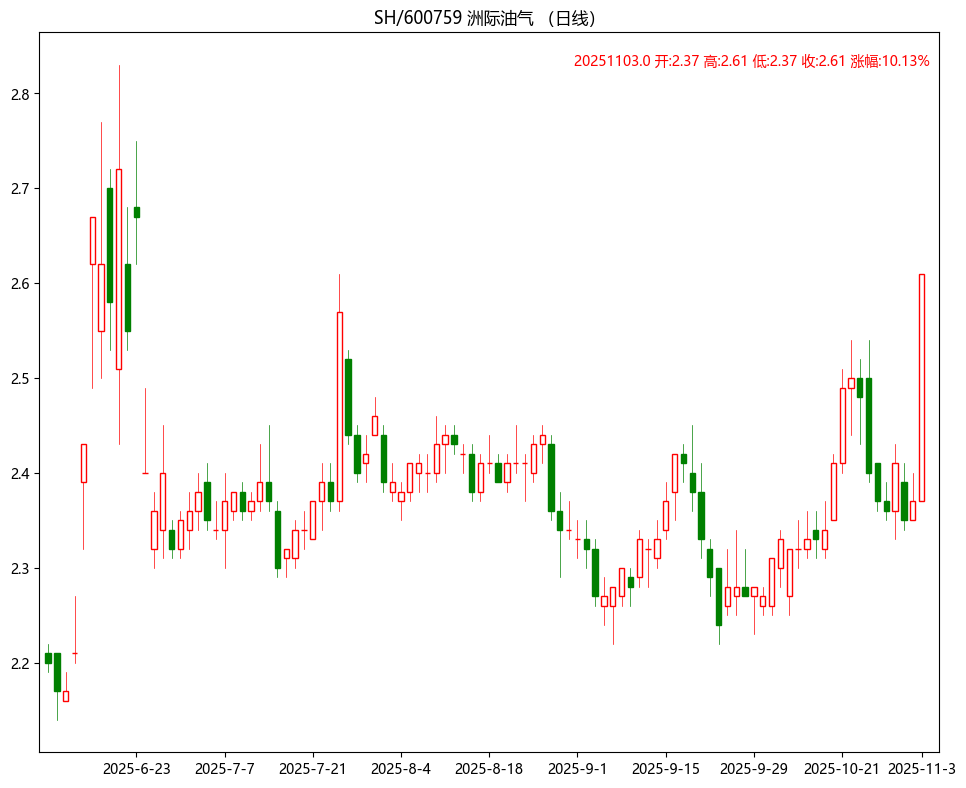

In [12]:
EXTRAS_RATE_10 = (CLOSE()/REF(CLOSE(), 10) - 1) * 100
EXTRAS_RATE_20 = (CLOSE()/REF(CLOSE(), 20) - 1) * 100
EXTRAS_RATE_50 = (CLOSE()/REF(CLOSE(), 50) - 1) * 100
EXTRAS_RATE_120 = (CLOSE()/REF(CLOSE(), 120) - 1) * 100
EXTRAS_RATE_250 = (CLOSE()/REF(CLOSE(), 250) - 1) * 100

# (CLOSE()-REF(CLOSE, 10)) / REF(CLOSE(), 10);
# print(len(stk_list))
# rind = RANK(stk_list, CLOSE(), 0)
# print(rind)

s = sm['sh600759']
q = Query(-100, recover_type=Query.FORWARD)
k = s.get_kdata(q)

e10 = EXTRAS_RATE_10(k)
print(e10)
e10.plot()

# 对齐
cal = sm.get_trading_calendar(q)

EXTRAS_RATE_20(k).plot(new = False)
EXTRAS_RATE_50(k).plot(new = False)
EXTRAS_RATE_120(k).plot(new = False)
EXTRAS_RATE_250(k).plot(new = False)
k.plot()
# r = RANK(stks=stk_list, ref_ind=CLOSE(k), mode=0)

# r(k).plot()
